This question should be answered using the Default data set discussed in the class.


In [ ]:
import pandas as pd

df = pd.read_csv('/content/Default.csv')
print(df)

      Unnamed: 0 default student      balance        income
0              1      No      No   729.526495  44361.625074
1              2      No     Yes   817.180407  12106.134700
2              3      No      No  1073.549164  31767.138947
3              4      No      No   529.250605  35704.493935
4              5      No      No   785.655883  38463.495879
...          ...     ...     ...          ...           ...
9995        9996      No      No   711.555020  52992.378914
9996        9997      No      No   757.962918  19660.721768
9997        9998      No      No   845.411989  58636.156984
9998        9999      No      No  1569.009053  36669.112365
9999       10000      No     Yes   200.922183  16862.952321

[10000 rows x 5 columns]


In [ ]:
# Remove the first column and encode the default and student column using label encoder

from sklearn.preprocessing import LabelEncoder

# Remove the first column
df = df.iloc[:, 1:]

# Encode 'default' and 'student' columns
le = LabelEncoder()
df['default'] = le.fit_transform(df['default'])
df['student'] = le.fit_transform(df['student'])

# Remove rows with NaN or missing values
df.dropna(inplace=True)

print(df)
defaulters = df[df['default'] == 1]
non_defaulters = df[df['default'] == 0]


      default  student      balance        income
0           0        0   729.526495  44361.625074
1           0        1   817.180407  12106.134700
2           0        0  1073.549164  31767.138947
3           0        0   529.250605  35704.493935
4           0        0   785.655883  38463.495879
...       ...      ...          ...           ...
9995        0        0   711.555020  52992.378914
9996        0        0   757.962918  19660.721768
9997        0        0   845.411989  58636.156984
9998        0        0  1569.009053  36669.112365
9999        0        1   200.922183  16862.952321

[10000 rows x 4 columns]


(a) Fit a logistic regression model to predict Default using given dataset.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

(b) Demonstrate prediction for some values.

In [ ]:

# Predict on the test set
y_pred = model.predict(X_test)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'student': X_test['student'], 'balance': X_test['balance'], 'income': X_test['income'], 'Actual': y_test, 'Predicted': y_pred})

print(results_df)


      student      balance        income  Actual  Predicted
9102        0   594.364428  24273.562482       0          0
7868        1   180.095142  27351.428820       0          0
4176        1   704.292704  13472.483192       0          0
4161        1  1581.065936  17331.325830       0          0
8770        0   828.889545  52560.907352       0          0
...       ...          ...           ...     ...        ...
8135        0  1318.719112  36822.924960       0          0
6918        0   802.857102  45806.199174       0          0
9950        0   879.624128  33682.186158       0          0
9870        1  1038.620081  12312.895964       0          0
1975        0   306.995203  43504.305236       0          0

[1000 rows x 5 columns]


(c) Print and Plot a confusion matrix for the model.

[[958   4]
 [ 30   8]]


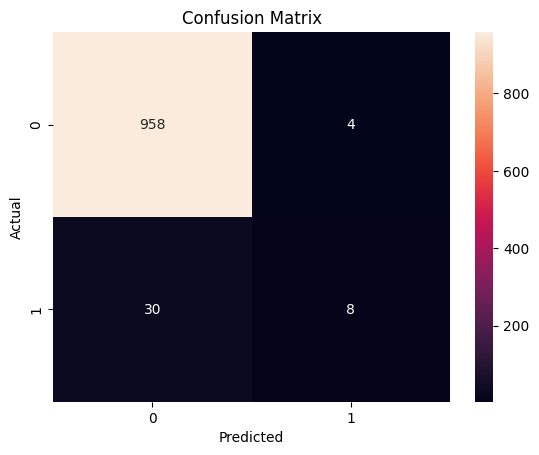

In [ ]:

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


(d) Identify appropriate metrics to measure the accuracy of the fit.

In [ ]:

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.966
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       962
           1       0.67      0.21      0.32        38

    accuracy                           0.97      1000
   macro avg       0.82      0.60      0.65      1000
weighted avg       0.96      0.97      0.96      1000



In [ ]:
# prompt: Calculate the specificity and negative predictive value

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Calculate negative predictive value
negative_predictive_value = TN / (TN + FN)
print("Negative Predictive Value:", negative_predictive_value)


Specificity: 0.9958419958419958
Negative Predictive Value: 0.9696356275303644


**Procedure:**

**Data Loading and Preparation:** The dataset is split into predictors (X) and response (y), which are then divided into training and testing sets.

**Model Training:** A logistic regression model is trained using the training dataset.

**Prediction:** The trained model is used to make predictions on the test dataset.

**Inference Summary:**

The model achieved high accuracy (96.6%), indicating that most predictions were correct.

The classification report highlights the model's performance per class. While Class 0(Non-Defaulter) has high precision and recall, Class 1(Defaulter) has significantly lower values, suggesting some difficulty in correctly identifying instances of Class 1(Defaulter).

Specificity (99.58%) and Negative Predictive Value (96.96%) are quite high, meaning the model is effective in identifying negative instances and making accurate negative predictions.